In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/original/Entrenamiento.csv")

In [3]:
df['Account_Created_Date'] = pd.to_datetime(df['Account_Created_Date'])
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'])
df['Last_Activity'] = pd.to_datetime(df['Last_Activity'])
df['Quote_Expiry_Date'] = pd.to_datetime(df['Quote_Expiry_Date'])
df['Last_Modified_Date'] = pd.to_datetime(df['Last_Modified_Date'])
df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'])
df['Planned_Delivery_End_Date'] = pd.to_datetime(df['Planned_Delivery_End_Date'])
df['Actual_Delivery_Date'] = pd.to_datetime(df['Actual_Delivery_Date'])

In [4]:
df['Territory'].value_counts()

None              4999
Germany           1682
NW America        1568
Australia         1208
India              809
                  ... 
Croatia              1
Burma                1
Georgia              1
Czech Republic       1
Slovenia             1
Name: Territory, Length: 76, dtype: int64

In [5]:
df['Region'].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [6]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [7]:
df[df['Stage']=='Closed Won']['Region'].value_counts()

Japan          3323
EMEA           2471
APAC           1896
Americas       1793
Middle East      50
Name: Region, dtype: int64

# Oportunidades exitosas por region

In [8]:
region_count_won = df[df['Stage']=='Closed Won'].groupby('Region').agg({'Region':'count'}).rename(columns={'Region':'Count_Region'}).sort_values('Count_Region', ascending=False).reset_index()
region_count_won

,Region,Count_Region
0,Japan,3323
1,EMEA,2471
2,APAC,1896
3,Americas,1793
4,Middle East,50


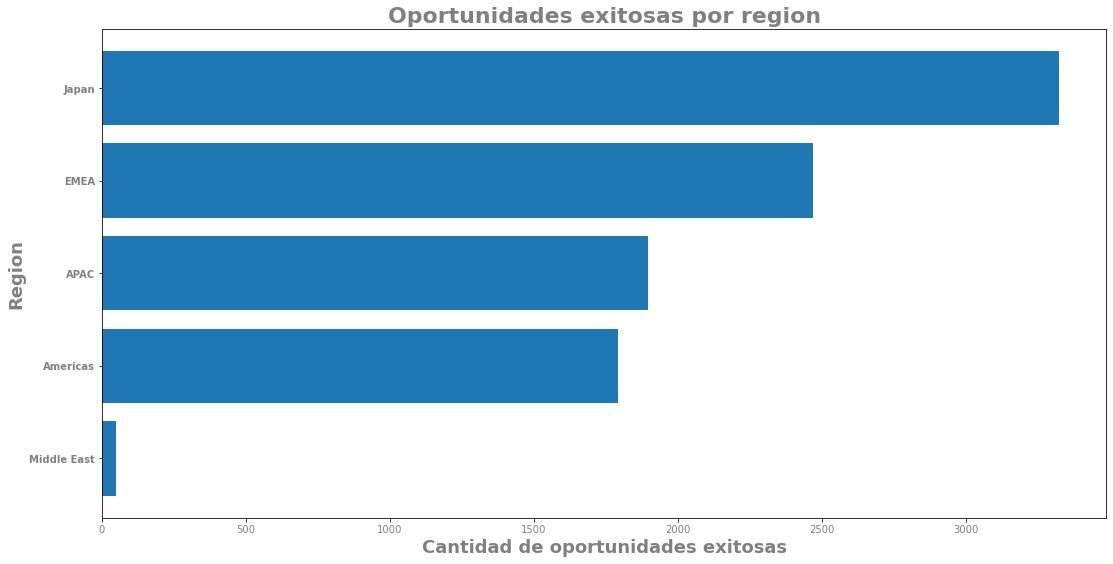

In [9]:
region_count_won = region_count_won.iloc[::-1]
height = region_count_won['Count_Region']
bars = region_count_won['Region']
y_pos = np.arange(len(bars))

plt.figure(figsize=(18, 9), facecolor='white')
 
plt.barh(y_pos, height)

plt.title('Oportunidades exitosas por region',fontweight='bold', color = 'grey', fontsize='22')
plt.xlabel('Cantidad de oportunidades exitosas',fontweight='bold', color = 'grey', fontsize='18')
plt.ylabel('Region',fontweight='bold', color = 'grey', fontsize='18')
 
plt.yticks(y_pos, bars ,fontweight='bold', color = 'grey', fontsize='10')
plt.xticks(color='gray')
 
plt.show()


# Top 3 de territorios por region con mayor cantidad de oportunidades exitosas

In [10]:
top_region_territorio_count_won = df[(df['Stage']=='Closed Won')].groupby(['Region','Territory']).agg({'Territory':'count'}).rename(columns={'Territory':'Count_Territory'})

In [11]:
top_region_territorio_count_won = top_region_territorio_count_won.groupby('Region')['Count_Territory'].nlargest(3).reset_index(level=0)
top_region_territorio_count_won = top_region_territorio_count_won[['Count_Territory']]
top_region_territorio_count_won

Count_Territory
Region      Territory                   
APAC        Australia                696
            India                    374
            Singapore                357
Americas    NW America               973
            NE America               259
            None                     188
EMEA        Germany                 1023
            Netherlands              257
            Belgium                  187
Japan       None                    2777
            Japan                    546
Middle East Jordan                    33
            None                       7
            KSA                        4

In [12]:
top_count_won_relativo = top_region_territorio_count_won.reset_index().merge(region_count_won)
top_count_won_relativo['Count_Relativo'] = top_count_won_relativo['Count_Territory']/top_count_won_relativo['Count_Region']
top_count_won_relativo = top_count_won_relativo.set_index(['Region','Territory'])
top_count_won_relativo

Count_Territory  Count_Region  Count_Relativo
Region      Territory                                                 
APAC        Australia                696          1896        0.367089
            India                    374          1896        0.197257
            Singapore                357          1896        0.188291
Americas    NW America               973          1793        0.542666
            NE America               259          1793        0.144451
            None                     188          1793        0.104852
EMEA        Germany                 1023          2471        0.414002
            Netherlands              257          2471        0.104006
            Belgium                  187          2471        0.075678
Japan       None                    2777          3323        0.835691
            Japan                    546          3323        0.164309
Middle East Jordan                    33            50        0.660000
            None                       7            50        0.140000
            KSA                        4            50        0.080000

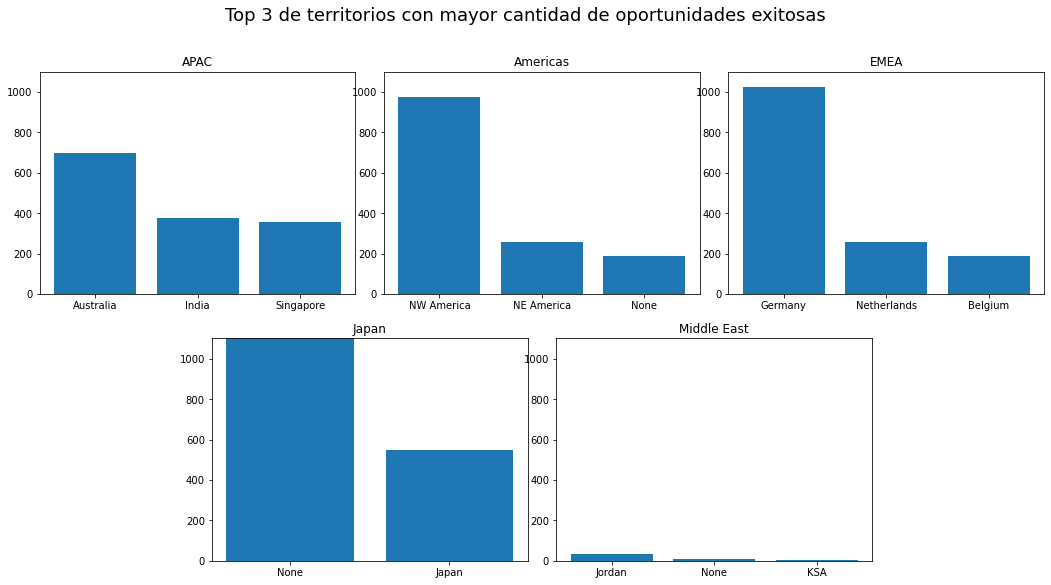

In [13]:
plt.figure(figsize=(18, 9))

height = top_region_territorio_count_won.loc['APAC',:].reset_index()['Count_Territory']
bars = top_region_territorio_count_won.loc['APAC',:].reset_index()['Territory']
y_pos = np.arange(len(bars))


ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax1.bar(y_pos, height)
ax1.set_xticks(y_pos)
ax1.set_xticklabels(bars)
ax1.set_title('APAC')
ax1.set_ylim([0, 1100])


height = top_region_territorio_count_won.loc['Americas',:].reset_index()['Count_Territory']
bars = top_region_territorio_count_won.loc['Americas',:].reset_index()['Territory']
y_pos = np.arange(len(bars))

ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax2.bar(y_pos, height)
ax2.set_xticks(y_pos)
ax2.set_xticklabels(bars)
ax2.set_title('Americas')
ax2.set_ylim([0, 1100])


height = top_region_territorio_count_won.loc['EMEA',:].reset_index()['Count_Territory']
bars = top_region_territorio_count_won.loc['EMEA',:].reset_index()['Territory']
y_pos = np.arange(len(bars))

ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax3.bar(y_pos, height)
ax3.set_xticks(y_pos)
ax3.set_xticklabels(bars)
ax3.set_title('EMEA')
ax3.set_ylim([0, 1100])


height = top_region_territorio_count_won.loc['Japan',:].reset_index()['Count_Territory']
bars = top_region_territorio_count_won.loc['Japan',:].reset_index()['Territory']
y_pos = np.arange(len(bars))

ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax4.bar(y_pos, height)
ax4.set_xticks(y_pos)
ax4.set_xticklabels(bars)
ax4.set_title('Japan')
ax4.set_ylim([0, 1100])


height = top_region_territorio_count_won.loc['Middle East',:].reset_index()['Count_Territory']
bars = top_region_territorio_count_won.loc['Middle East',:].reset_index()['Territory']
y_pos = np.arange(len(bars))

ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
ax5.bar(y_pos, height)
ax5.set_xticks(y_pos)
ax5.set_xticklabels(bars)
ax5.set_title('Middle East')
ax5.set_ylim([0, 1100])

plt.suptitle('Top 3 de territorios con mayor cantidad de oportunidades exitosas', fontsize=18)
plt.show()

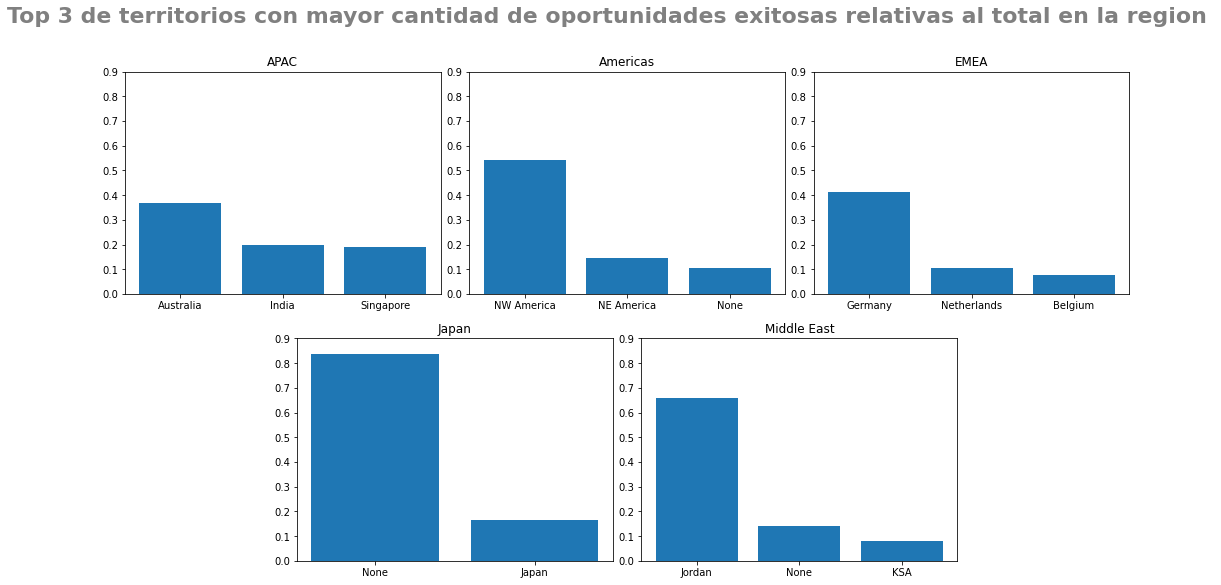

In [29]:
plt.figure(figsize=(18, 9))

height = top_count_won_relativo.loc['APAC',:].reset_index()['Count_Relativo']
bars = top_count_won_relativo.loc['APAC',:].reset_index()['Territory']
y_pos = np.arange(len(bars))


ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax1.bar(y_pos, height)
ax1.set_xticks(y_pos)
ax1.set_xticklabels(bars)
ax1.set_title('APAC')
ax1.set_ylim([0, 0.9])


height = top_count_won_relativo.loc['Americas',:].reset_index()['Count_Relativo']
bars = top_count_won_relativo.loc['Americas',:].reset_index()['Territory']
y_pos = np.arange(len(bars))

ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax2.bar(y_pos, height)
ax2.set_xticks(y_pos)
ax2.set_xticklabels(bars)
ax2.set_title('Americas')
ax2.set_ylim([0, 0.9])


height = top_count_won_relativo.loc['EMEA',:].reset_index()['Count_Relativo']
bars = top_count_won_relativo.loc['EMEA',:].reset_index()['Territory']
y_pos = np.arange(len(bars))

ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax3.bar(y_pos, height)
ax3.set_xticks(y_pos)
ax3.set_xticklabels(bars)
ax3.set_title('EMEA')
ax3.set_ylim([0, 0.9])


height = top_count_won_relativo.loc['Japan',:].reset_index()['Count_Relativo']
bars = top_count_won_relativo.loc['Japan',:].reset_index()['Territory']
y_pos = np.arange(len(bars))

ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax4.bar(y_pos, height)
ax4.set_xticks(y_pos)
ax4.set_xticklabels(bars)
ax4.set_title('Japan')
ax4.set_ylim([0, 0.9])


height = top_count_won_relativo.loc['Middle East',:].reset_index()['Count_Relativo']
bars = top_count_won_relativo.loc['Middle East',:].reset_index()['Territory']
y_pos = np.arange(len(bars))

ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
ax5.bar(y_pos, height)
ax5.set_xticks(y_pos)
ax5.set_xticklabels(bars)
ax5.set_title('Middle East')
ax5.set_ylim([0, 0.9])

plt.suptitle('Top 3 de territorios con mayor cantidad de oportunidades exitosas relativas al total en la region ', fontweight='bold', color = 'grey', fontsize='22')

# Save graphic
plt.savefig('../tp/figuras/top3_regiones_exitosas.png')

plt.show()

# Oportunidades ganadas y perdidas por region

In [15]:
Count_Won = df[df['Stage']=='Closed Won'].groupby('Region').agg({'Region':'count'}).rename(columns={'Region':'Count_Won'}).reset_index()
Count_Lost = df[df['Stage']=='Closed Lost'].groupby('Region').agg({'Region':'count'}).rename(columns={'Region':'Count_Lost'}).reset_index()
Count = Count_Won.merge(Count_Lost)
Count

,Region,Count_Won,Count_Lost
0,APAC,1896,1355
1,Americas,1793,2140
2,EMEA,2471,2189
3,Japan,3323,1546
4,Middle East,50,120


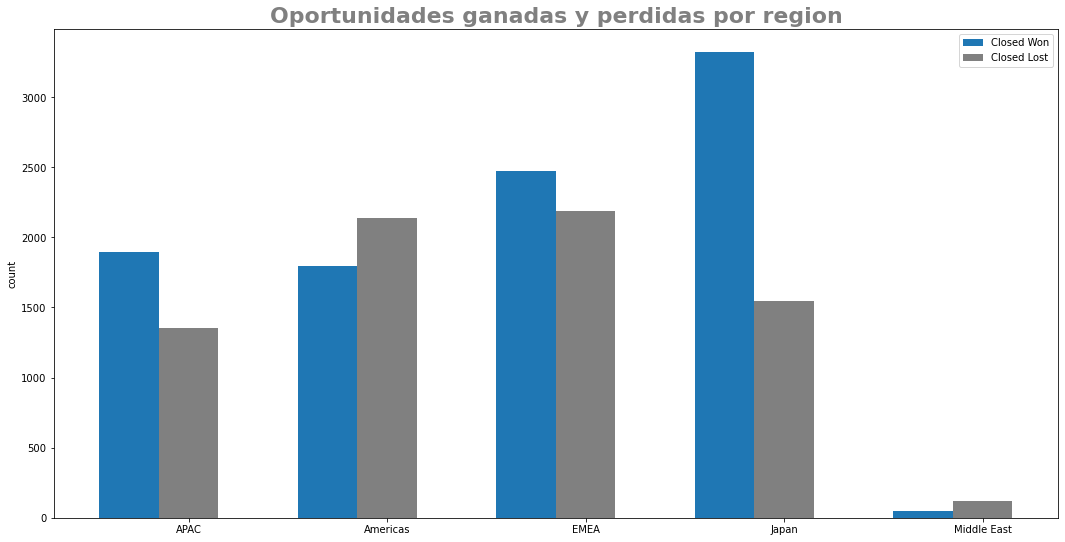

In [28]:
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = Count['Count_Won']
 
# Choose the height of the cyan bars
bars2 = Count['Count_Lost']
 
# Choose the height of the error bars (bars1)
#yer1 = [0.5, 0.4, 0.5]
 
# Choose the height of the error bars (bars2)
#yer2 = [1, 0.7, 1]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(18, 9))

# Create blue bars
plt.bar(r1, bars1, width = barWidth, label='Closed Won')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'gray', label='Closed Lost')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['APAC', 'Americas', 'EMEA', 'Japan', 'Middle East'])
plt.ylabel('count')

plt.title('Oportunidades ganadas y perdidas por region',fontweight='bold', color = 'grey', fontsize='22')
plt.legend()

# Save graphic
plt.savefig('../tp/figuras/oportunidades_ganadas_perdidas_por_region.png')
# Show graphic
plt.show()

